In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas

from sklearn.datasets import fetch_openml # функция библиотеки scikit-learn для загрузки данных с сайта OpenML

from sklearn.decomposition import PCA # Метод главных компонент от мира scikit-learn


from sklearn.preprocessing import StandardScaler # Стандартизация от мира scikit-learn

import plotly.express as px # yet another 3-D рисовалка
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
plt.style.use('dark_background')

In [ ]:
# воспользуемся функцией fetch_openml для загрузки данных с сайта OpenML
# грузим SignMNIST - жесты, используются жесты руками
X, y  = fetch_openml('SignMNIST', version=1, return_X_y=True, as_frame = True)
X = X / 255. # нормализуем данные - из диапазона от 0 до 255 в диапазон от 0 до 1

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Просмторим нашу таблицу данных
X

pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0      0.419608  0.462745  0.498039  0.525490  0.545098  0.560784  0.572549   
1      0.607843  0.615686  0.611765  0.611765  0.611765  0.615686  0.611765   
2      0.733333  0.737255  0.737255  0.733333  0.733333  0.729412  0.733333   
3      0.827451  0.827451  0.831373  0.831373  0.827451  0.823529  0.827451   
4      0.643137  0.654902  0.666667  0.674510  0.690196  0.701961  0.705882   
...         ...       ...       ...       ...       ...       ...       ...   
34622  0.529412  0.466667  0.423529  0.400000  0.411765  0.388235  0.239216   
34623  0.615686  0.623529  0.631373  0.643137  0.650980  0.650980  0.670588   
34624  0.745098  0.749020  0.745098  0.749020  0.745098  0.745098  0.752941   
34625  0.788235  0.803922  0.815686  0.819608  0.839216  0.847059  0.854902   
34626  0.678431  0.682353  0.678431  0.682353  0.678431  0.678431  0.686275   

         pixel8    pixel9   pixel10  ...  pixel775  pixel776  pixel777  \
0      0.588235  0.600000  0.611765  ...  0.811765  0.811765  0.811765   
1      0.619608  0.619608  0.615686  ...  0.270588  0.584314  0.501961   
2      0.737255  0.733333  0.729412  ...  0.792157  0.788235  0.784314   
3      0.823529  0.823529  0.827451  ...  0.921569  0.917647  0.913725   
4      0.721569  0.725490  0.729412  ...  0.360784  0.411765  0.411765   
...         ...       ...       ...  ...       ...       ...       ...   
34622  0.403922  0.474510  0.521569  ...  0.423529  0.439216  0.454902   
34623  0.682353  0.686275  0.690196  ...  0.835294  0.835294  0.835294   
34624  0.752941  0.749020  0.752941  ...  0.847059  0.843137  0.835294   
34625  0.874510  0.886275  0.898039  ...  0.439216  0.662745  1.000000   
34626  0.686275  0.682353  0.686275  ...  0.788235  0.784314  0.772549   

       pixel778  pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  
0      0.811765  0.807843  0.807843  0.807843  0.800000  0.796078  0.792157  
1      0.341176  0.368627  0.639216  0.686275  0.403922  0.529412  0.584314  
2      0.780392  0.776471  0.780392  0.776471  0.764706  0.760784  0.764706  
3      0.905882  0.901961  0.886275  0.882353  0.870588  0.898039  0.639216  
4      0.423529  0.521569  0.639216  0.615686  0.639216  0.643137  0.701961  
...         ...       ...       ...       ...       ...       ...       ...  
34622  0.447059  0.462745  0.705882  0.721569  0.690196  0.654902  0.639216  
34623  0.839216  0.835294  0.827451  0.823529  0.823529  0.819608  0.815686  
34624  0.839216  0.839216  0.835294  0.823529  0.827451  0.819608  0.815686  
34625  1.000000  0.929412  0.443137  0.356863  0.262745  0.274510  0.247059  
34626  0.776471  0.776471  0.772549  0.764706  0.764706  0.756863  0.752941  

[34627 rows x 784 columns]

In [ ]:
X.describe()

pixel1        pixel2        pixel3        pixel4        pixel5  \
count  34627.000000  34627.000000  34627.000000  34627.000000  34627.000000   
mean       0.571989      0.583934      0.594815      0.603863      0.614183   
std        0.164076      0.158257      0.154337      0.152011      0.146087   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.478431      0.494118      0.509804      0.521569      0.537255   
50%        0.592157      0.603922      0.611765      0.619608      0.627451   
75%        0.686275      0.694118      0.701961      0.705882      0.709804   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  34627.000000  34627.000000  34627.000000  34627.000000  34627.000000   
mean       0.623153      0.630773      0.637690      0.644288      0.650596   
std        0.141689      0.138332      0.133874      0.128950      0.123585   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.549020      0.560784      0.568627      0.572549      0.580392   
50%        0.639216      0.643137      0.650980      0.654902      0.658824   
75%        0.713725      0.721569      0.725490      0.725490      0.729412   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  34627.000000  34627.000000  34627.000000  34627.000000   
mean   ...      0.551274      0.576825      0.599181      0.621189   
std    ...      0.250646      0.256620      0.253778      0.251420   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.358824      0.376471      0.400000      0.431373   
50%    ...      0.556863      0.631373      0.674510      0.701961   
75%    ...      0.768627      0.792157      0.803922      0.811765   
max    ...      1.000000      1.000000      1.000000      1.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  34627.000000  34627.000000  34627.000000  34627.000000  34627.000000   
mean       0.632675      0.635675      0.634994      0.631675      0.628280   
std        0.251196      0.250535      0.251634      0.250558      0.252531   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.462745      0.478431      0.486275      0.486275      0.486275   
50%        0.717647      0.717647      0.717647      0.713725      0.713725   
75%        0.815686      0.811765      0.811765      0.807843      0.803922   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           pixel784  
count  34627.000000  
mean       0.622663  
std        0.255891  
min        0.000000  
25%        0.474510  
50%        0.709804  
75%        0.800000  
max        1.000000  

[8 rows x 784 columns]

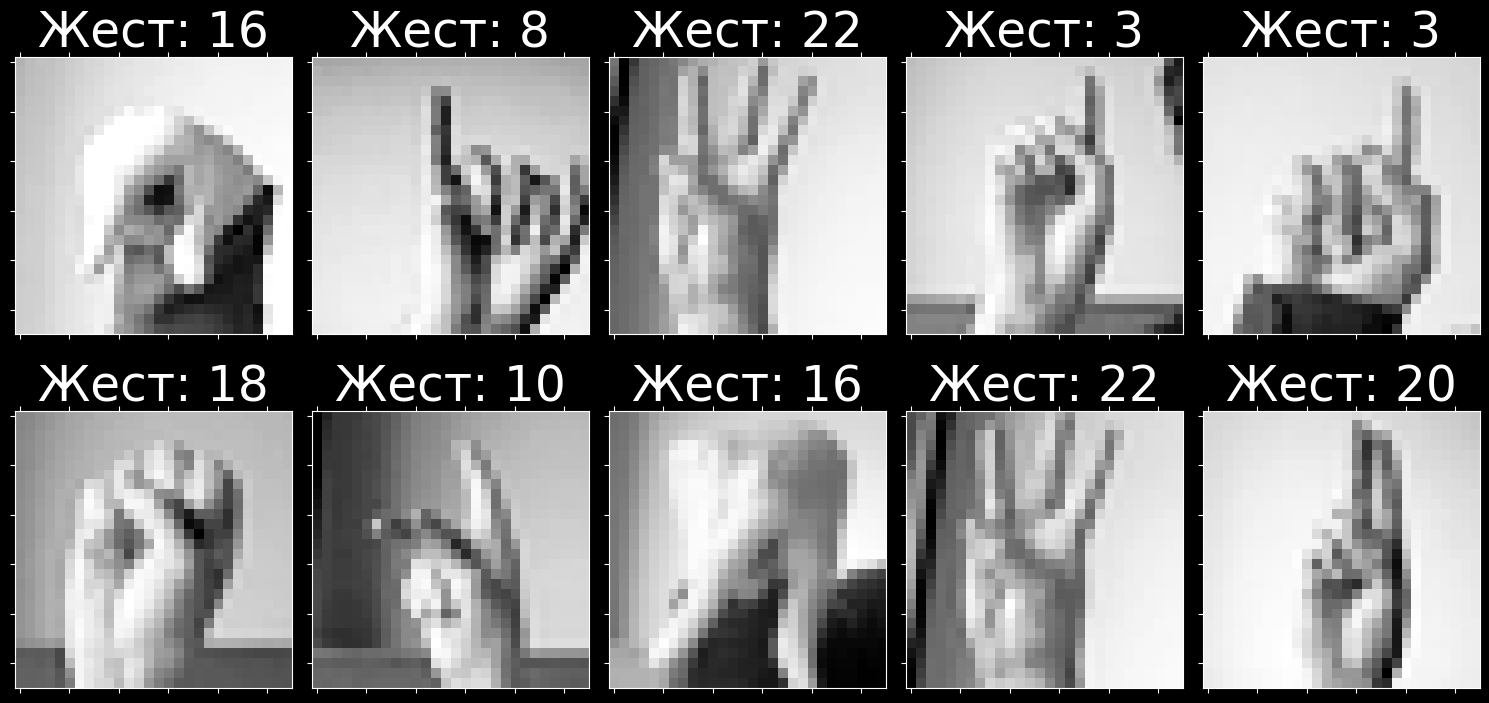

In [ ]:
#@title Разные примеры { run: "auto" }
n =  5 #@param {type:"slider", min:1, max:10303, step:1}

# создаем полотно
fig = plt.figure( figsize=(15,8) )
# на котором визуализируем 10 примеров изображений
# начиная с индекса n
for i in range(0,10):
    # каждое изображение будет на своем сабплоте
    ax = fig.add_subplot(2,5,i+1)
    # пишем какое число должно быть
    ax.set_title("Жест: {}".format(str(y[i+n]) ), size=35)
    # отрисовываем с помощью функции matshow
    # для этого нам вектор-строку из 784 элементов
    # нужно преобразовать в матрицу 28 на 28
    ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()

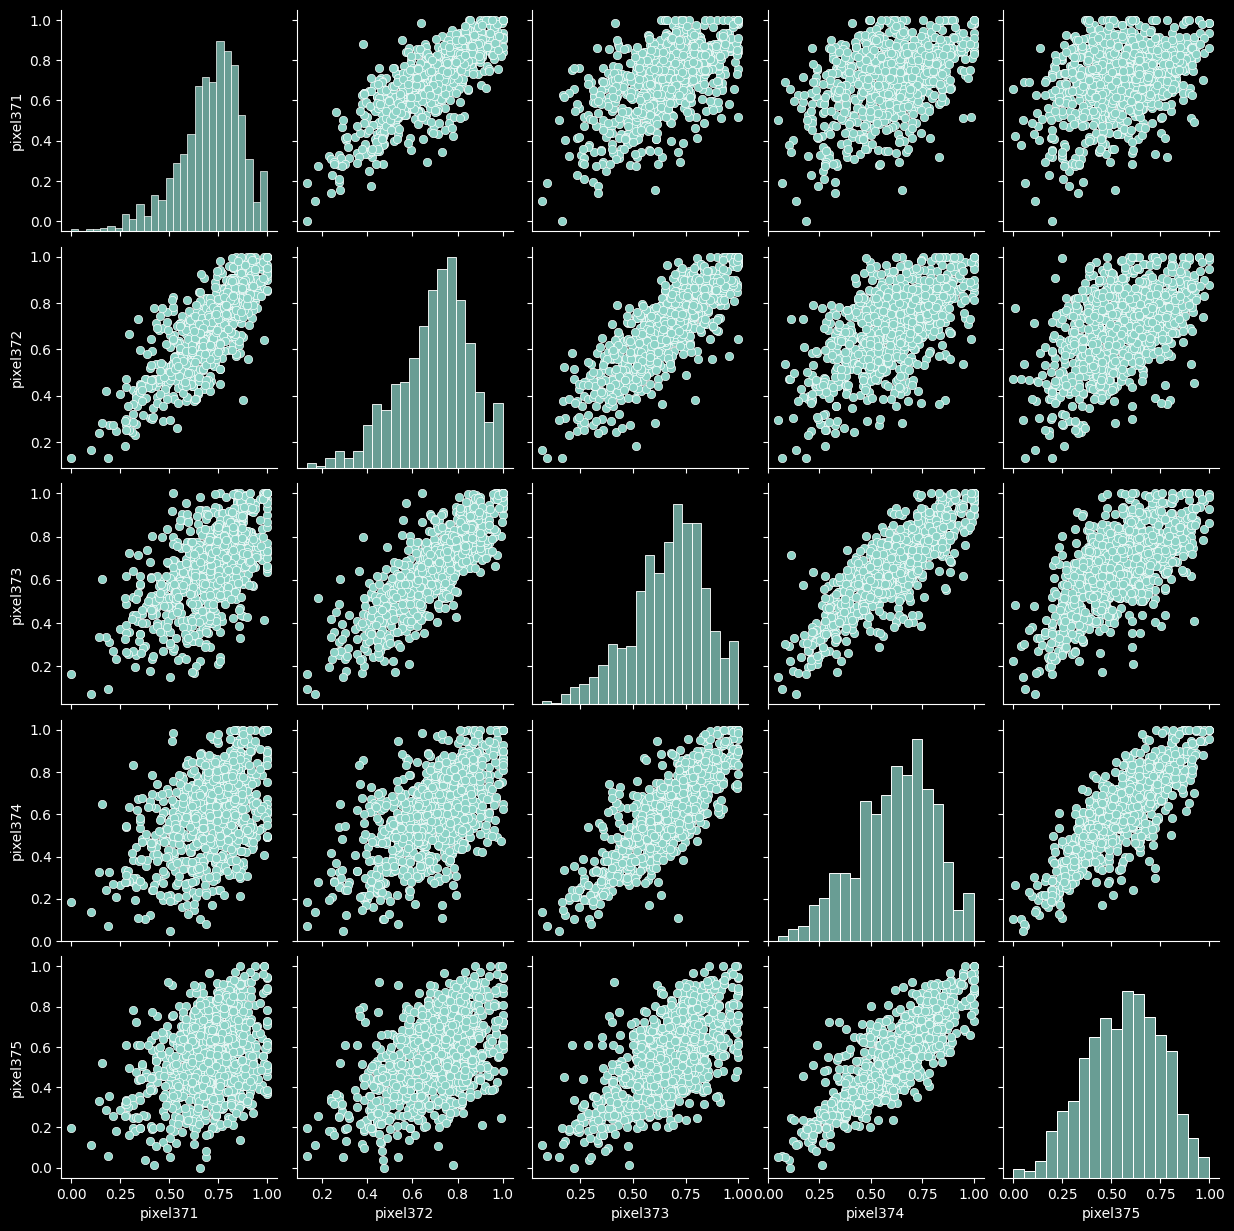

In [ ]:
# Отобразим рисунки в виде табличных данных
X_plot = X.loc[0:1000,'pixel371':'pixel375'].copy() # данные из середины
sns.pairplot(X_plot);

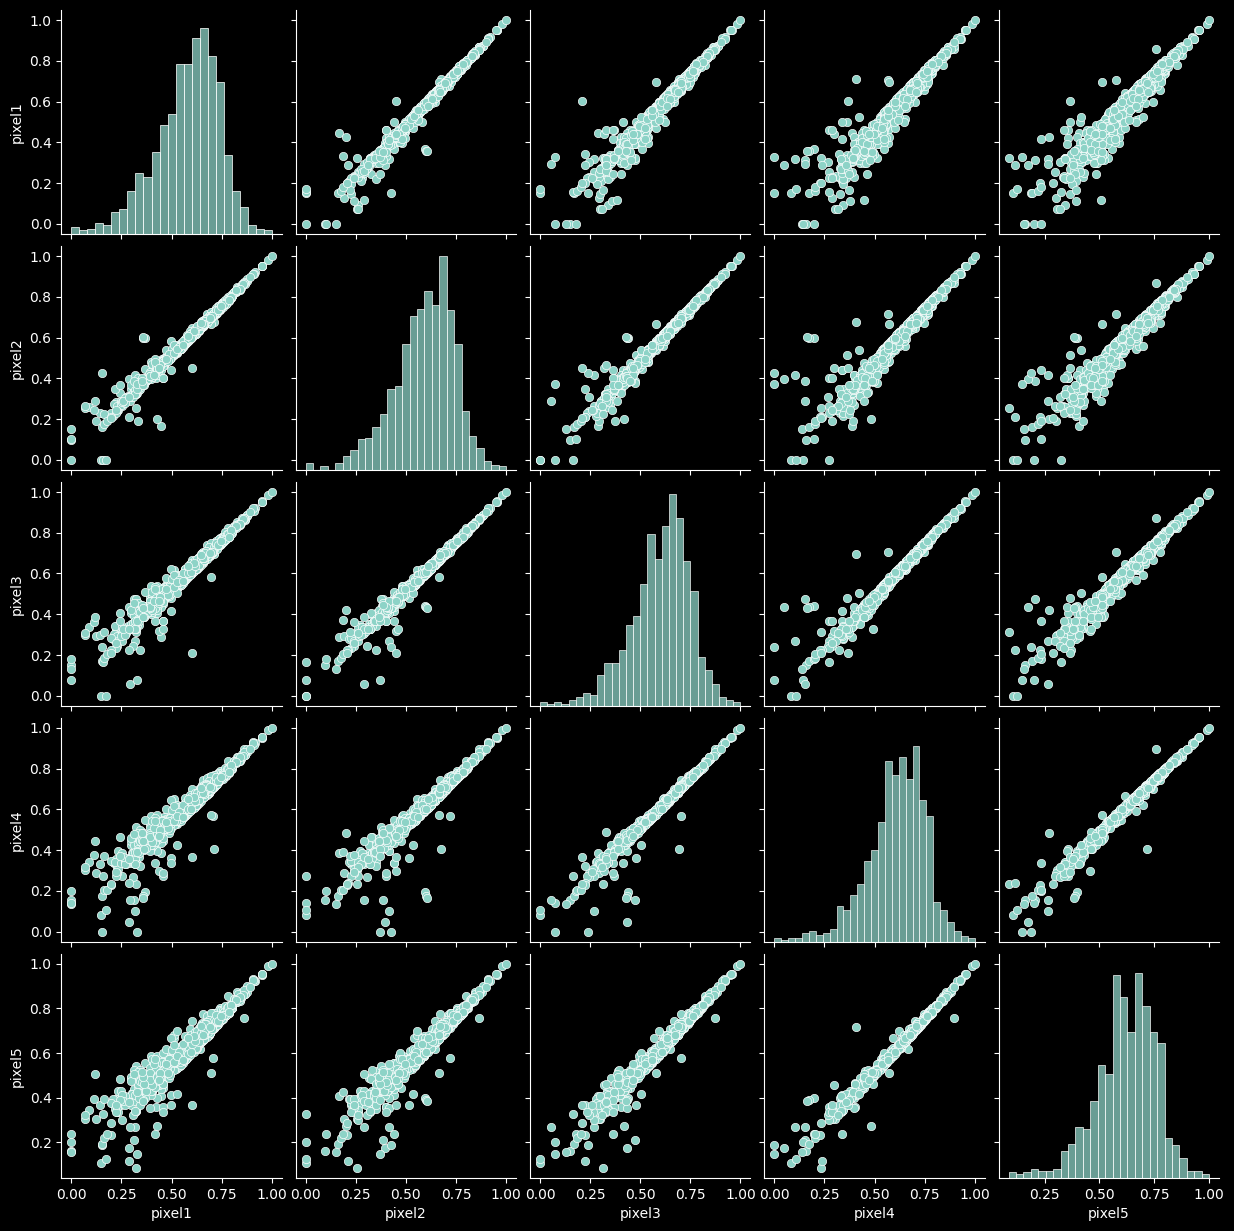

In [ ]:
X_plot = X.loc[0:1000,'pixel1':'pixel5'].copy() # данные из первой строки
sns.pairplot(X_plot);

Можно использовать метод главный компонени, т.к. наблюдается некоторая структура данных, где значения отличны от 0

Что так же интересно, как и признаки pixel370-735

In [ ]:
# Применяем Метод Главных Компонент к Данным MNIST
# Обучаем через .fit()

pca = PCA(n_components = 784)
pca.fit(X)

PCA(n_components=784)

In [ ]:
# Оцениваем пространство главных компонент
pca_result_mnist = pca.transform(X)

In [ ]:
# Визуализация
EV=pca.explained_variance_ratio_

(0.0, 1.1)

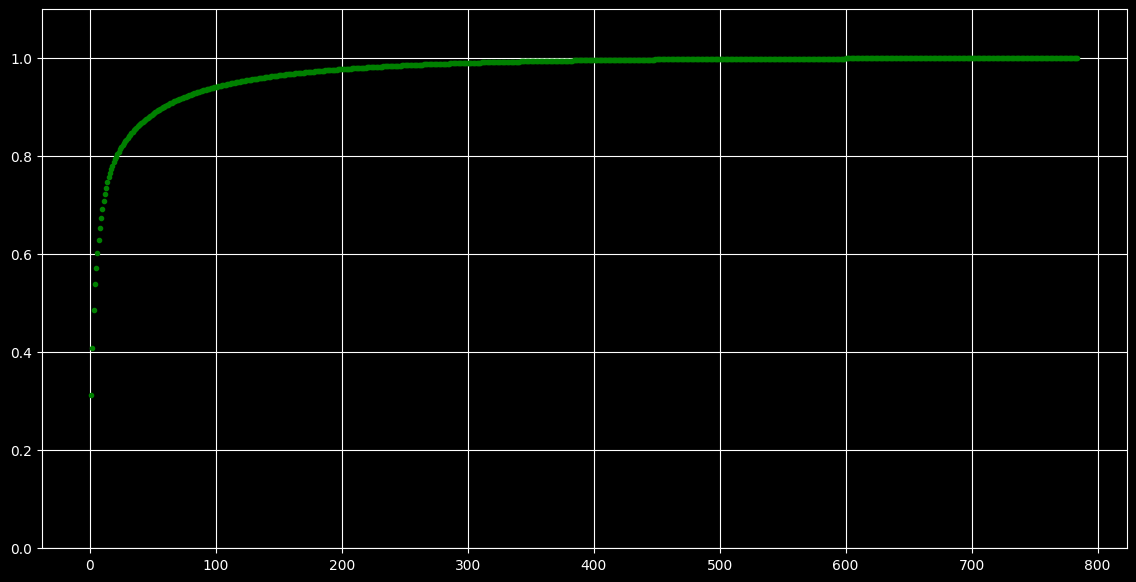

In [ ]:
# Построение графиков объясненной дисперсии

fig = plt.figure( figsize=(14,7) )
plt.plot(np.array(range(len(EV)))+1,np.cumsum(EV),'o',linewidth=1, markersize=3, c = 'g')
plt.grid()
plt.ylim(0,1.1)

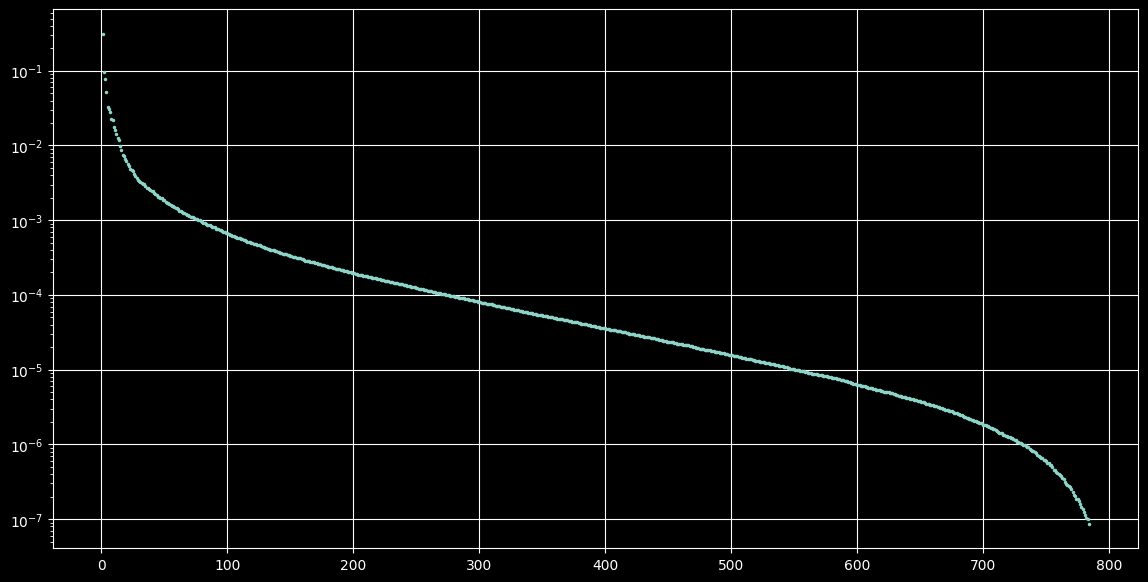

In [ ]:
fig = plt.figure( figsize=(14,7) )
plt.semilogy(np.array(range(len(EV)))+1,EV,'.',linewidth=1, markersize=3)
plt.grid()

Визуализация пространства

In [ ]:
def plot_multi(data, y,  names):
    """Нескольких двумерных проекций многомерных данных (pairplot на минималках)
    Входные переменные:
    ===========
    data: данные
    y: целевые метки
    names: подписи к осям
    """
    # собираем оси данных, которые мы визуализируем
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]

    # собираем подписи к осям в нужном порядке
    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    # создаем полотно 2 на 2
    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    # в каждом графике этого полотна мы визуализируем соответсвующие проекции
    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        # визуализация - стандартная скатерограмма
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y,  # разные метки будут подсвечены разным цветом
                             s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)
        ax.grid()
        ax.set_xlim([-9,10])
        ax.set_ylim([-7,7])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Цифры",
                        fontsize = 10) # собираем легенду
        ax.add_artist(legend1)

In [ ]:
pca_names = [str(x+1)+'-я главная компонента' for x in range(4)]

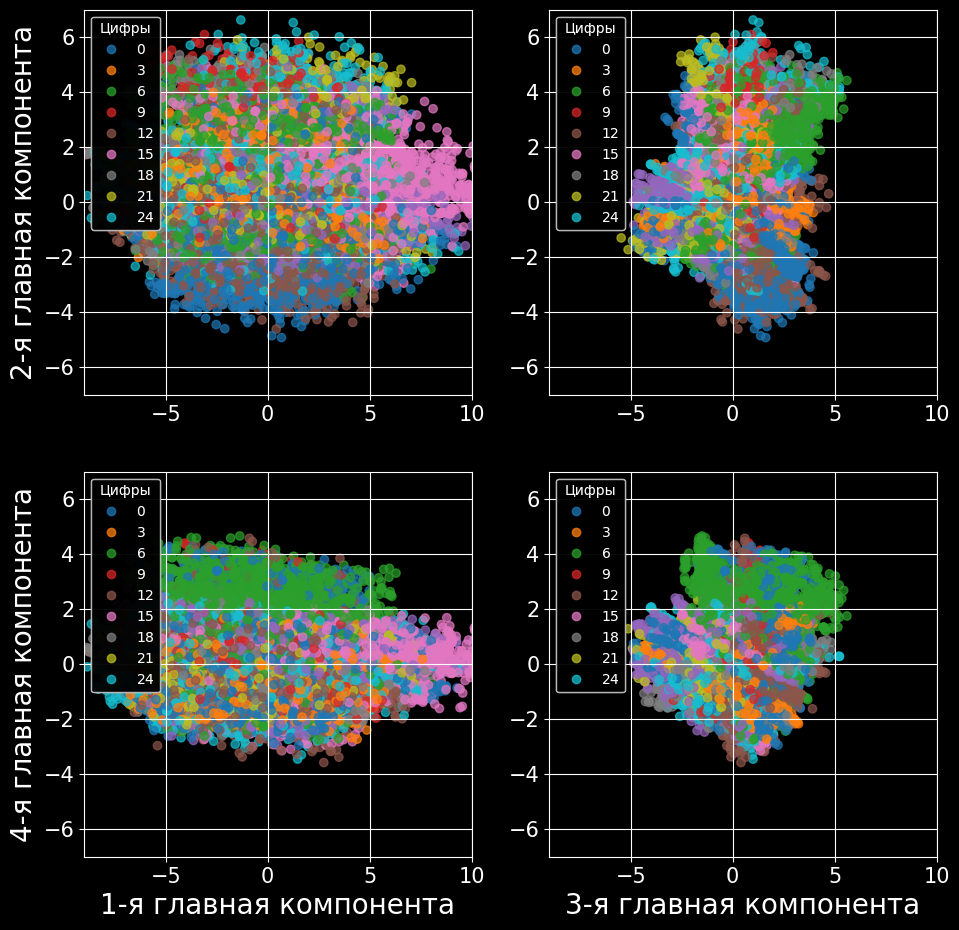

In [ ]:
plot_multi(pca_result_mnist, y.astype(int), pca_names);

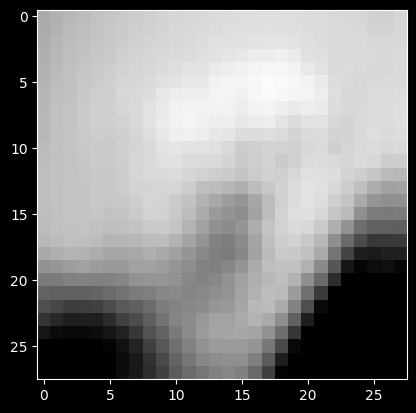

In [ ]:
#@title Изображение жеста используя только 4 числа{ run: "auto" }
#@markdown ### 1 главная компонента
pca1 =  3 #@param {type:"slider", min:-10, max:10, step:0.1}
#@markdown ### 2 главная компонента
pca2 =  7 #@param {type:"slider", min:-10, max:10, step:0.1}
#@markdown ### 3 главная компонента
pca3 =  1 #@param {type:"slider", min:-10, max:10, step:0.1}
#@markdown ### 4 главная компонента
pca4 =  5 #@param {type:"slider", min:-10, max:10, step:0.1}

test_input = np.array([pca1,pca2,pca3,pca4])


pca_inverse = np.dot(test_input, pca.components_[:4]) + pca.mean_

plt.imshow(1-pca_inverse.reshape((28,28)).astype(float),
           cmap='Greys',
           vmin = 0, vmax = 1);

Из 4 компонентов не получится создать изображение жеста

Восстановление данных

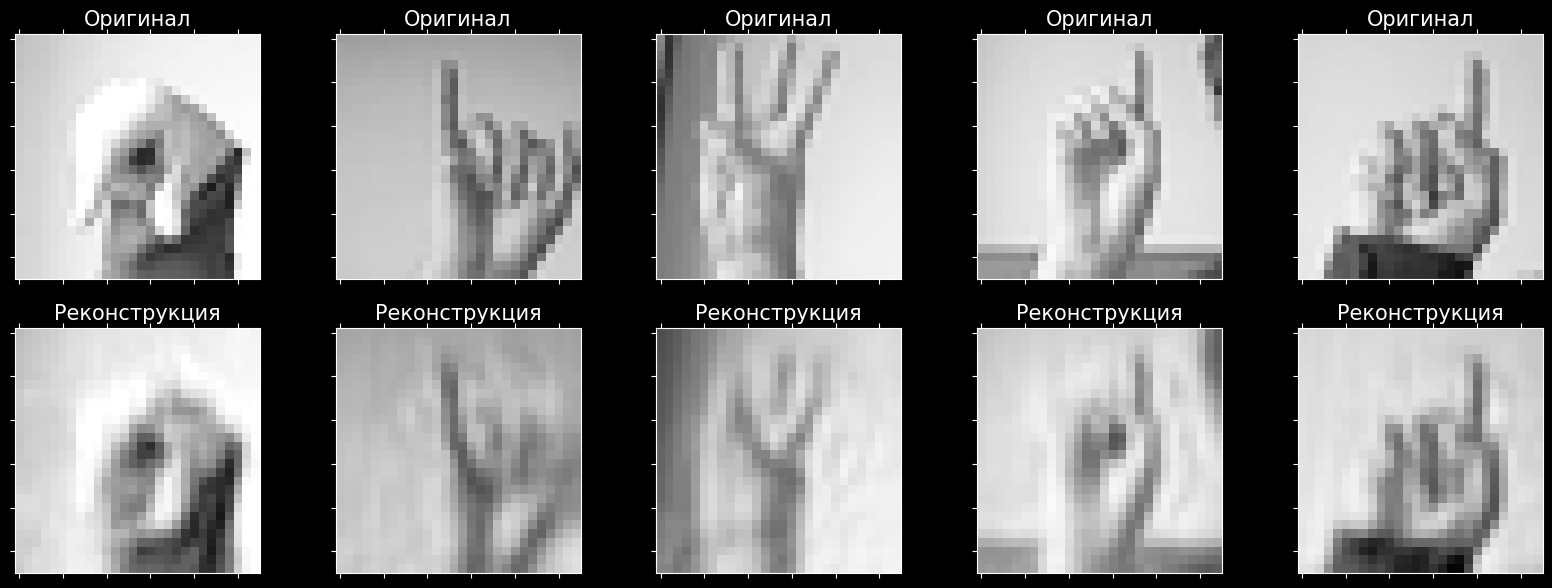

In [ ]:
# Восстановление данных

#@title  { run: "auto" }
#@markdown ### Разные примеры
n =  5 #@param {type:"slider", min:1, max:69984, step:1}
#@markdown ### Количество компонент для восстановления
n_comp =  80 #@param {type:"slider", min:0, max:100, step:1}

pca_inverse = np.dot(pca_result_mnist[:,:n_comp], pca.components_[:n_comp]) + pca.mean_


fig=plt.figure(figsize=(20,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Реконструкция", size=15)
  ax.matshow(1-pca_inverse[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Оригинал", size=15)
  ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

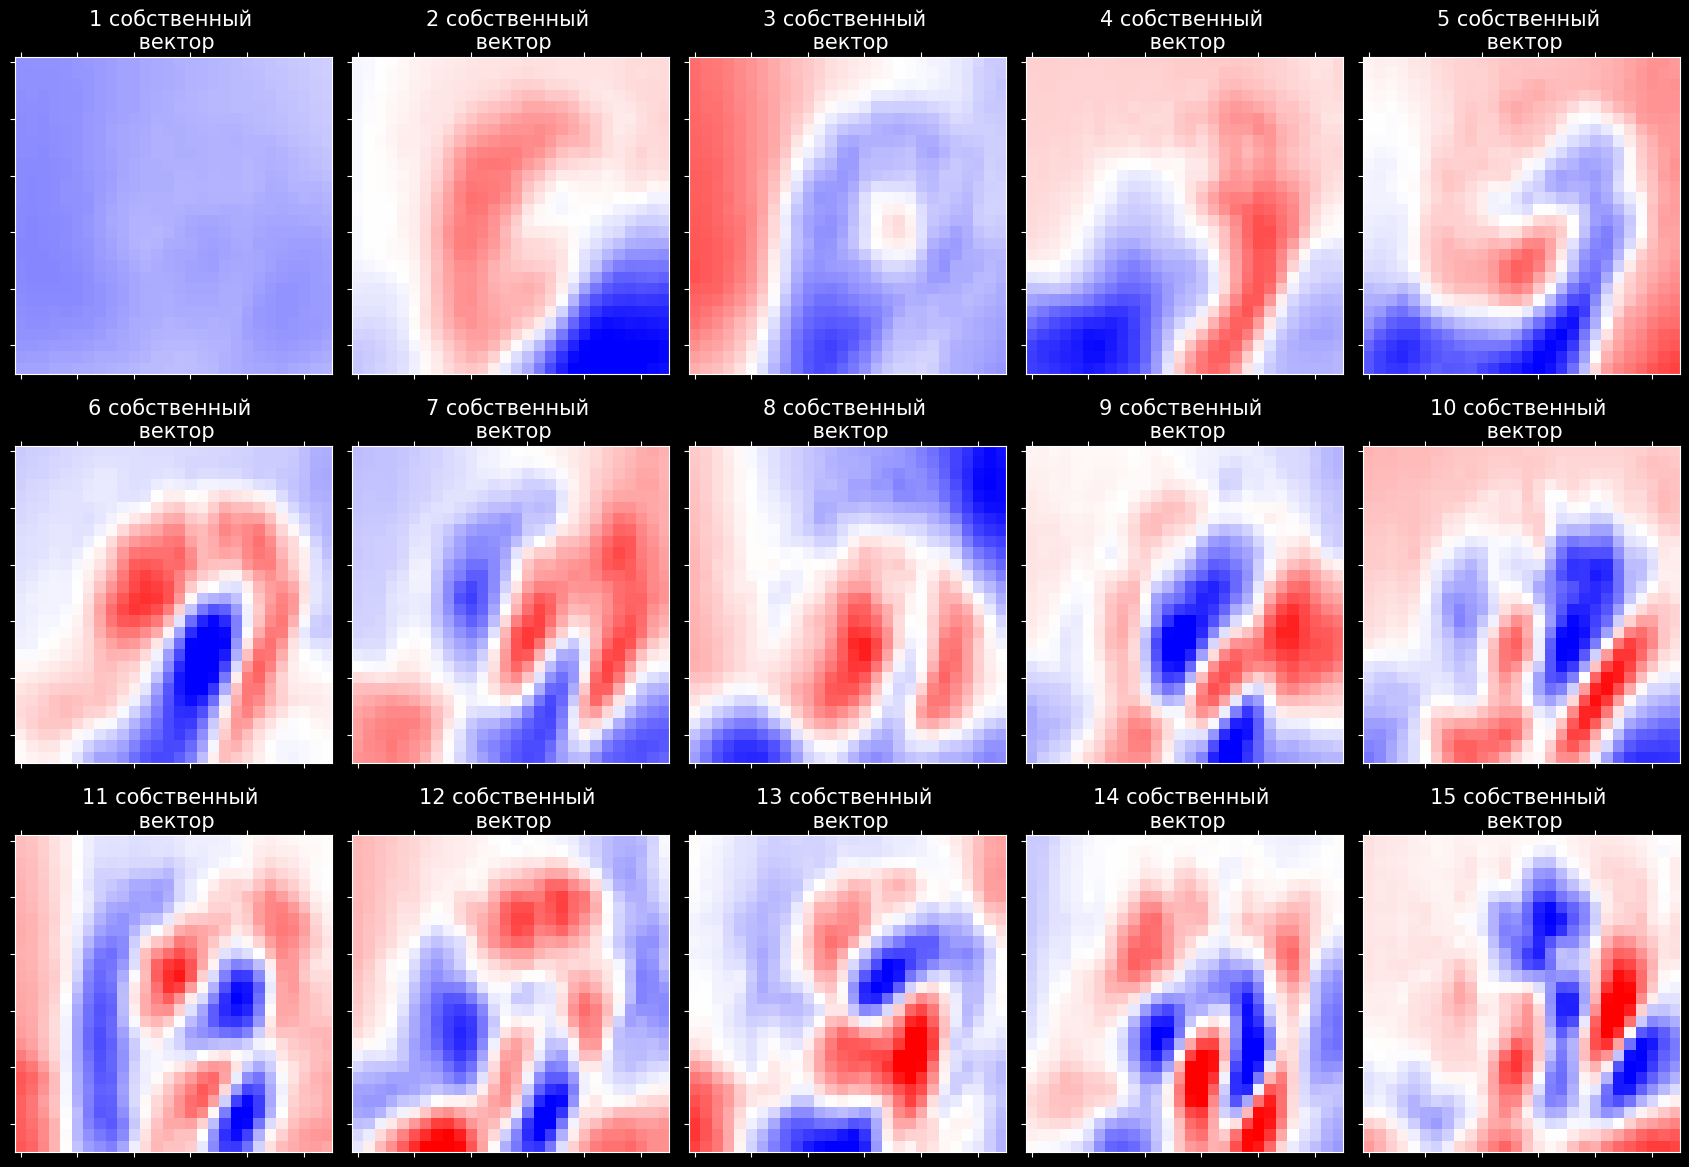

In [ ]:
# Попытка понять что значат главные компоненты
# Визуализируем собственные вектора сделал преобразование
# от вектор-строки из 784 элементов в матрицу 28 на 28

# Поскольку отдельный собственный вектор
# это веса всех исходных признаков в отдельных главных компонентах. Т.е. это вектор соразмерный с исходными данными,
# а значит его тоже можно представить в виде изображения

W_pca=pca.components_
fig=plt.figure(figsize=(17,12))
for i in range(0,15):
  ax = fig.add_subplot(3,5,i+1,title=str(i+1) )
  ax.set_title("{} собственный \n вектор".format(str(i+1)), size=15)
  ax.matshow(W_pca[i].reshape((28,28)).astype(float), cmap = 'bwr', vmin=-0.1,vmax = 0.1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout();

In [ ]:
# Посмотрим на относительно значимые признаки для первой главной компоненты
sum(np.abs(pca.components_[0,:])>0.001)

784

Lля первой главной компоненты важно знать информацию о 784 пикселей исходных изображений

При этом используя только их можно уже отличать жест 1 от жеста 2

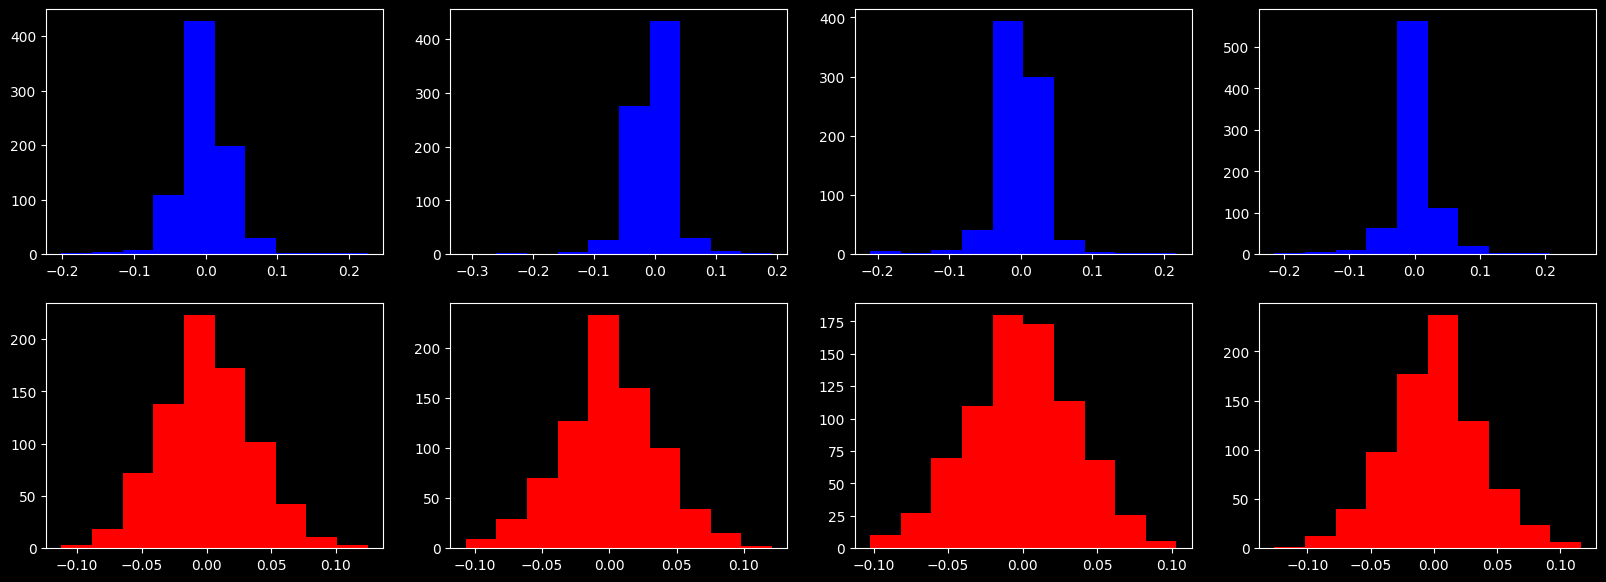

In [ ]:
# Посмотрим на веса исходных признаков.

# В частности посмотрим на пиксели с 1 по 4 и с 371 по 374.

fig = plt.figure(figsize = (20,7))
plt.subplot(241)
plt.hist(pca.components_[:,0],color='b')
plt.subplot(242)
plt.hist(pca.components_[:,1],color='b')
plt.subplot(243)
plt.hist(pca.components_[:,2],color='b')
plt.subplot(244)
plt.hist(pca.components_[:,3],color='b')
plt.subplot(245)
plt.hist(pca.components_[:,370],color='r')
plt.subplot(246)
plt.hist(pca.components_[:,371],color='r')
plt.subplot(247)
plt.hist(pca.components_[:,372],color='r')
plt.subplot(248)
plt.hist(pca.components_[:,373],color='r');

Бесполезные признаки имеют вес строго 0

Для относительно бесполезных признаков есть разрос весов - есть как положительные, так и отрицательные

А значит что-то оказывается полезным с т.з. главных компонент

Таким образом метод главных компонент сам понял какие пиксели важные, а какие нет

In [ ]:
# 3D Визуализация
# Складываем результаты PCA в Датафрейм Pandas

# Не забываем про столбец меток цифр

pca_names = ['pca-'+ str(x+1)for x in range(784)]
df = pd.DataFrame(pca_result_mnist, columns = pca_names)
df['label'] = y
df

pca-1     pca-2     pca-3     pca-4     pca-5     pca-6     pca-7  \
0      0.515900 -1.734853 -0.701634  0.615902 -0.435084  1.559718  0.063852   
1      1.330902  0.207751  0.728882  1.811690 -0.535450  0.874134 -0.134105   
2     -0.152248 -2.678174  2.149183  1.817785 -1.564172 -0.584201  0.491791   
3     -1.086100 -1.714329  2.733887  3.232427  1.359898 -0.437153 -2.132622   
4     -0.939557 -0.287524  0.582930 -0.919653  1.341126 -0.812337  0.019292   
...         ...       ...       ...       ...       ...       ...       ...   
34622  1.064365  0.050522 -2.825551  1.096699  0.276769  0.098190  0.962400   
34623 -1.595107 -0.106239 -0.192500 -1.919263  0.681839 -0.968845 -0.263657   
34624 -0.875007 -3.152771  2.078215  0.237502 -0.916963 -0.801070  1.500057   
34625 -6.731755  0.751085  0.184380 -1.105899 -0.404092 -2.255868  0.616246   
34626  1.111170 -3.499873  2.551202  0.133290 -0.956045 -0.838569  1.599659   

          pca-8     pca-9    pca-10  ...   pca-776   pca-777   pca-778  \
0     -1.067892  0.218983 -0.084681  ...  0.003816  0.000568  0.002031   
1      0.733180 -0.066147  0.341868  ...  0.000593  0.001676 -0.002674   
2      1.566556 -1.129763 -1.154337  ... -0.001726  0.000386 -0.000465   
3      1.954234  0.321862 -1.311029  ... -0.003789  0.000392 -0.000666   
4      0.138145  0.537837  0.292163  ...  0.000900  0.000471  0.001285   
...         ...       ...       ...  ...       ...       ...       ...   
34622  0.326139  0.161269 -0.559512  ...  0.000042 -0.002698  0.001173   
34623 -0.410012 -0.051087 -0.202460  ...  0.000834  0.001705  0.000286   
34624 -0.576178 -1.211637 -0.296541  ...  0.002186  0.001539 -0.001524   
34625 -0.567451 -0.618294 -0.633579  ...  0.000913 -0.001711  0.000427   
34626 -0.456073 -1.194522 -0.304961  ... -0.000474  0.000262  0.001137   

        pca-779   pca-780   pca-781   pca-782   pca-783   pca-784  label  
0      0.000854  0.000974  0.002324 -0.000656 -0.000085 -0.001911      3  
1      0.001038  0.000708 -0.001850 -0.000239  0.000788 -0.001733      6  
2      0.000684 -0.003545 -0.000743 -0.000722 -0.000087  0.002793      2  
3     -0.000528 -0.000879  0.001054 -0.000214  0.001047  0.001585      2  
4      0.003298  0.000006 -0.000554 -0.000596 -0.003021 -0.000685     13  
...         ...       ...       ...       ...       ...       ...    ...  
34622 -0.004596 -0.002197  0.001178  0.000055 -0.001690 -0.003051      1  
34623  0.002594  0.005579 -0.001082 -0.000670 -0.001696  0.002070     12  
34624  0.000098  0.000140 -0.000090  0.000775  0.001202  0.000060      2  
34625  0.002145 -0.002834  0.001916 -0.000273 -0.000249  0.001208      4  
34626  0.001016 -0.002120  0.001891  0.000616  0.003297  0.000422      2  

[34627 rows x 785 columns]

In [ ]:
fig = px.scatter_3d(df, x=df["pca-1"], y=df["pca-2"], z=df["pca-3"],
              color=df["label"])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

Итоговый вывод:

- Яркость пикселей также играет роль в распознавании объектов.
- На графике дисперсии видно, что достаточно 80 компонентов, что бы можно было восстановить 80% информации с изображения.
- Метод главных компонент может определять сходства с неплохой точностью.
